## Preprocessing Data
[Dataset](https://www.kaggle.com/datasets/nancyalaswad90/diamonds-prices)

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read data
data = pd.read_csv("/content/Diamonds Prices2022.csv")
# remove an unamed column
data.drop(data.filter(regex="Unnamed"),axis=1, inplace=True)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [9]:
import numpy as np
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["carat", "depth", "table", "x", "y", "z"]),
    (OneHotEncoder(handle_unknown="ignore"), ["cut", "color", "clarity"])
)

# create X and y values
X = data.drop("price", axis = 1)
y = data["price"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# fit column transformer
ct.fit(X_train)

# transform training and test data
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [10]:
X_train_normal[0]

array([0.18837209, 0.47222222, 0.47222222, 0.64222874, 0.11018676,
       0.48635236, 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        ])

In [11]:
X_test_normal[0]

array([0.00930233, 0.53055556, 0.36111111, 0.38807429, 0.06791171,
       0.30645161, 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       0.        ])

## Build a neural network

In [26]:
# create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(18, activation='relu'),
    tf.keras.layers.Dense(15, activation='relu'),
    tf.keras.layers.Dense(1)
])

# compile
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["mae"])

# fit
model.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
1349/1349 [==============================] - 4s 2ms/step - loss: 3117.9885 - mae: 3117.9885
Epoch 2/200
1349/1349 [==============================] - 2s 2ms/step - loss: 2491.0171 - mae: 2491.0171
Epoch 3/200
1349/1349 [==============================] - 2s 2ms/step - loss: 2282.5315 - mae: 2282.5315
Epoch 4/200
1349/1349 [==============================] - 2s 2ms/step - loss: 2018.5503 - mae: 2018.5503
Epoch 5/200
1349/1349 [==============================] - 3s 2ms/step - loss: 1483.9666 - mae: 1483.9666
Epoch 6/200
1349/1349 [==============================] - 2s 2ms/step - loss: 809.3961 - mae: 809.3961
Epoch 7/200
1349/1349 [==============================] - 2s 2ms/step - loss: 532.4380 - mae: 532.4380
Epoch 8/200
1349/1349 [==============================] - 2s 2ms/step - loss: 441.7353 - mae: 441.7353
Epoch 9/200
1349/1349 [==============================] - 2s 2ms/step - loss: 400.2520 - mae: 400.2520
Epoch 10/200
1349/1349 [==============================] - 3s 2ms/step - 

In [27]:
model.evaluate(X_test_normal, y_test)

338/338 [==============================] - 1s 1ms/step - loss: 307.3064 - mae: 307.3064


[307.306396484375, 307.306396484375]

In [29]:
# make some predictions
y_pred = model.predict(X_test_normal)

338/338 [==============================] - 1s 1ms/step


## Plotting

In [43]:
def plot_predictions(train_data = X_train_normal[:,0], 
                     train_labels = y_train,
                     test_data = X_test_normal[:,0],
                     test_labels = y_test, 
                     predictions = y_pred):
  """
  Plots training data,test data, and compares to predictions to ground truth labels
  """
  plt.figure(figsize = (10, 7))

  # plot test data in green
  plt.scatter(test_data, test_labels, c = "g", label = "Test Data")

  # plot predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")

  # show a legend
  plt.legend()

In [41]:
X_train_normal[:,0]

array([0.18837209, 0.20930233, 0.30232558, ..., 0.03023256, 0.1627907 ,
       0.21860465])

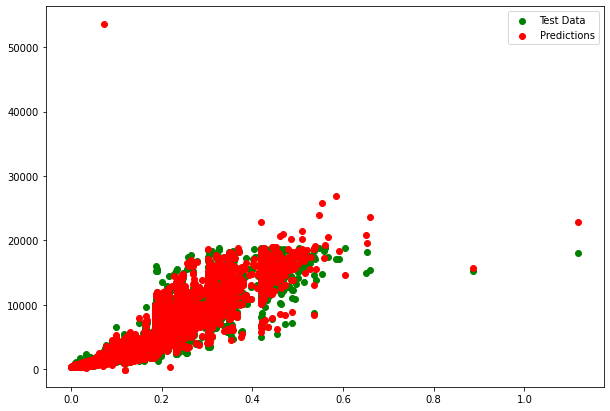

In [44]:
plot_predictions()